### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
import warnings 
warnings.filterwarnings("ignore")

### Reading Files

In [2]:
calendar = pd.read_csv("calendar.csv")
price = pd.read_csv("sell_prices.csv")
sales = pd.read_csv("sales_train_validation.csv")

### Viewing Files

In [3]:
#Calendar
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [4]:
#Number of Rows and Columns
calendar.shape

(1969, 14)

In [5]:
#Date to Week
dictWeek = dict(zip(calendar.d.values, calendar.wm_yr_wk.values))

In [6]:
#Price
price.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [7]:
price.columns

Index(['store_id', 'item_id', 'wm_yr_wk', 'sell_price'], dtype='object')

In [8]:
#Creating common index for all dataset
price['item_store_id'] = price['store_id'] + '-' + price['item_id']

In [9]:
price.head()

,store_id,item_id,wm_yr_wk,sell_price,item_store_id
0,CA_1,HOBBIES_1_001,11325,9.58,CA_1-HOBBIES_1_001
1,CA_1,HOBBIES_1_001,11326,9.58,CA_1-HOBBIES_1_001
2,CA_1,HOBBIES_1_001,11327,8.26,CA_1-HOBBIES_1_001
3,CA_1,HOBBIES_1_001,11328,8.26,CA_1-HOBBIES_1_001
4,CA_1,HOBBIES_1_001,11329,8.26,CA_1-HOBBIES_1_001


In [10]:
#Number of Rows and Columns
price.shape

(6841121, 5)

In [11]:
price = price.pivot(index='item_store_id', columns='wm_yr_wk', values='sell_price').fillna(0)

In [12]:
#Number of Rows and Columns after Pivot
price.shape

(30490, 282)

In [13]:
price.head()

wm_yr_wk,11101,11102,11103,11104,11105,11106,11107,11108,11109,11110,...,11612,11613,11614,11615,11616,11617,11618,11619,11620,11621
item_store_id,,,,,,,,,,,,,,,,,,,,,
CA_1-FOODS_1_001,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,...,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24
CA_1-FOODS_1_002,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,...,9.48,9.48,9.48,9.48,9.48,9.48,9.48,9.48,9.48,9.48
CA_1-FOODS_1_003,2.88,2.88,2.88,2.88,2.88,2.88,2.88,2.88,2.88,2.88,...,3.23,3.23,3.23,3.23,3.23,3.23,3.23,3.23,3.23,3.23
CA_1-FOODS_1_004,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.96,1.96,1.96,1.96,1.96,1.96,1.96,1.96,1.96,1.96
CA_1-FOODS_1_005,2.94,2.94,2.94,2.94,2.94,2.94,2.94,2.94,2.94,2.94,...,3.54,3.54,3.54,3.54,3.54,3.54,3.54,3.54,3.54,3.54


In [14]:
matrixPrice = price.to_numpy()

In [15]:
matrixPrice

array([[ 2.  ,  2.  ,  2.  , ...,  2.24,  2.24,  2.24],
       [ 7.88,  7.88,  7.88, ...,  9.48,  9.48,  9.48],
       [ 2.88,  2.88,  2.88, ...,  3.23,  3.23,  3.23],
       ...,
       [18.47, 18.47, 18.47, ..., 19.54, 19.54, 19.54],
       [ 0.  ,  0.  ,  0.  , ...,  1.97,  1.97,  1.97],
       [ 5.94,  5.94,  5.94, ...,  5.94,  5.94,  5.94]])

In [16]:
pr_n = dict(zip(price.index, range(len(price.index))))
pr_p = dict(zip(price.columns, range(len(price.columns))))

In [17]:
pr_n

{'CA_1-FOODS_1_001': 0,
 'CA_1-FOODS_1_002': 1,
 'CA_1-FOODS_1_003': 2,
 'CA_1-FOODS_1_004': 3,
 'CA_1-FOODS_1_005': 4,
 'CA_1-FOODS_1_006': 5,
 'CA_1-FOODS_1_008': 6,
 'CA_1-FOODS_1_009': 7,
 'CA_1-FOODS_1_010': 8,
 'CA_1-FOODS_1_011': 9,
 'CA_1-FOODS_1_012': 10,
 'CA_1-FOODS_1_013': 11,
 'CA_1-FOODS_1_014': 12,
 'CA_1-FOODS_1_015': 13,
 'CA_1-FOODS_1_016': 14,
 'CA_1-FOODS_1_017': 15,
 'CA_1-FOODS_1_018': 16,
 'CA_1-FOODS_1_019': 17,
 'CA_1-FOODS_1_020': 18,
 'CA_1-FOODS_1_021': 19,
 'CA_1-FOODS_1_022': 20,
 'CA_1-FOODS_1_023': 21,
 'CA_1-FOODS_1_024': 22,
 'CA_1-FOODS_1_025': 23,
 'CA_1-FOODS_1_026': 24,
 'CA_1-FOODS_1_027': 25,
 'CA_1-FOODS_1_028': 26,
 'CA_1-FOODS_1_029': 27,
 'CA_1-FOODS_1_030': 28,
 'CA_1-FOODS_1_031': 29,
 'CA_1-FOODS_1_032': 30,
 'CA_1-FOODS_1_033': 31,
 'CA_1-FOODS_1_034': 32,
 'CA_1-FOODS_1_035': 33,
 'CA_1-FOODS_1_036': 34,
 'CA_1-FOODS_1_037': 35,
 'CA_1-FOODS_1_038': 36,
 'CA_1-FOODS_1_039': 37,
 'CA_1-FOODS_1_040': 38,
 'CA_1-FOODS_1_041': 39,
 'CA_1-FOO

In [18]:
pr_p

{11101: 0,
 11102: 1,
 11103: 2,
 11104: 3,
 11105: 4,
 11106: 5,
 11107: 6,
 11108: 7,
 11109: 8,
 11110: 9,
 11111: 10,
 11112: 11,
 11113: 12,
 11114: 13,
 11115: 14,
 11116: 15,
 11117: 16,
 11118: 17,
 11119: 18,
 11120: 19,
 11121: 20,
 11122: 21,
 11123: 22,
 11124: 23,
 11125: 24,
 11126: 25,
 11127: 26,
 11128: 27,
 11129: 28,
 11130: 29,
 11131: 30,
 11132: 31,
 11133: 32,
 11134: 33,
 11135: 34,
 11136: 35,
 11137: 36,
 11138: 37,
 11139: 38,
 11140: 39,
 11141: 40,
 11142: 41,
 11143: 42,
 11144: 43,
 11145: 44,
 11146: 45,
 11147: 46,
 11148: 47,
 11149: 48,
 11150: 49,
 11151: 50,
 11152: 51,
 11201: 52,
 11202: 53,
 11203: 54,
 11204: 55,
 11205: 56,
 11206: 57,
 11207: 58,
 11208: 59,
 11209: 60,
 11210: 61,
 11211: 62,
 11212: 63,
 11213: 64,
 11214: 65,
 11215: 66,
 11216: 67,
 11217: 68,
 11218: 69,
 11219: 70,
 11220: 71,
 11221: 72,
 11222: 73,
 11223: 74,
 11224: 75,
 11225: 76,
 11226: 77,
 11227: 78,
 11228: 79,
 11229: 80,
 11230: 81,
 11231: 82,
 11232: 83,
 1

In [19]:
COLS_ITM = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'] #list of all common indexs

In [20]:
COLS_DATE = ['d_' + str(i) for i in range(1, 366)] #to identify date

In [21]:
#Sales
sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


#### The id of sales and price dataframes are different. 

In [22]:
sales['id'] = sales['store_id'] + '-' + sales['item_id']

In [23]:
sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,CA_1-HOBBIES_1_001,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,CA_1-HOBBIES_1_002,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,CA_1-HOBBIES_1_003,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,CA_1-HOBBIES_1_004,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,CA_1-HOBBIES_1_005,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [24]:
sales.set_index(COLS_ITM, inplace = True)

In [25]:
sales.head()

,,,,,,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
id,item_id,dept_id,cat_id,store_id,state_id,,,,,,,,,,,,,,,,,,,,,
CA_1-HOBBIES_1_001,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
CA_1-HOBBIES_1_002,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
CA_1-HOBBIES_1_003,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
CA_1-HOBBIES_1_004,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
CA_1-HOBBIES_1_005,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [26]:
# Scope = Year 1
sales = sales[COLS_DATE]

In [27]:
sales.head()

,,,,,,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_356,d_357,d_358,d_359,d_360,d_361,d_362,d_363,d_364,d_365
id,item_id,dept_id,cat_id,store_id,state_id,,,,,,,,,,,,,,,,,,,,,
CA_1-HOBBIES_1_001,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA_1-HOBBIES_1_002,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
CA_1-HOBBIES_1_003,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA_1-HOBBIES_1_004,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,...,0,1,1,8,1,3,0,1,2,3
CA_1-HOBBIES_1_005,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [28]:
# Mean
sales['Mean'] = sales[COLS_DATE].mean(axis = 1)

In [29]:
sales.head()

,,,,,,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_357,d_358,d_359,d_360,d_361,d_362,d_363,d_364,d_365,Mean
id,item_id,dept_id,cat_id,store_id,state_id,,,,,,,,,,,,,,,,,,,,,
CA_1-HOBBIES_1_001,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
CA_1-HOBBIES_1_002,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0.175342
CA_1-HOBBIES_1_003,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
CA_1-HOBBIES_1_004,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,...,1,1,8,1,3,0,1,2,3,1.282192
CA_1-HOBBIES_1_005,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.794521


In [30]:
# Standard
sales['STD'] = sales[COLS_DATE].std(axis = 1)

In [31]:
sales.head()

,,,,,,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_358,d_359,d_360,d_361,d_362,d_363,d_364,d_365,Mean,STD
id,item_id,dept_id,cat_id,store_id,state_id,,,,,,,,,,,,,,,,,,,,,
CA_1-HOBBIES_1_001,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,0.000000
CA_1-HOBBIES_1_002,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0.175342,0.459270
CA_1-HOBBIES_1_003,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,0.000000
CA_1-HOBBIES_1_004,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,...,1,8,1,3,0,1,2,3,1.282192,1.504512
CA_1-HOBBIES_1_005,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.794521,1.543854


In [32]:
sales.shape

(30490, 367)

In [33]:
# Remove items not sold during the first year
sales = sales[sales['Mean'] > 0]

In [34]:
sales.head()

,,,,,,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_358,d_359,d_360,d_361,d_362,d_363,d_364,d_365,Mean,STD
id,item_id,dept_id,cat_id,store_id,state_id,,,,,,,,,,,,,,,,,,,,,
CA_1-HOBBIES_1_002,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0.175342,0.459270
CA_1-HOBBIES_1_004,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,...,1,8,1,3,0,1,2,3,1.282192,1.504512
CA_1-HOBBIES_1_005,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.794521,1.543854
CA_1-HOBBIES_1_008,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,12,15,0,0,0,4,6,5,7,0,...,20,26,0,9,14,0,8,18,6.854795,8.556423
CA_1-HOBBIES_1_009,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,2,0,7,3,0,2,3,9,0,0,...,1,0,0,1,0,0,3,0,1.816438,2.486613


In [35]:
sales.shape

(17055, 367)

In [36]:
#Reset Index
sales.reset_index(inplace = True)

In [37]:
# Total Units
sales['Units'] = sales[COLS_DATE].sum(axis = 1)

In [38]:
# Turnover = Units x Price
sales['Turnover'] = 0 
for col in COLS_DATE:
    sales['Turnover'] = sales['Turnover'] + sales[col] * sales[['id', col]].apply(
        lambda t: matrixPrice[pr_n[t['id']], pr_p[dictWeek[col]]], axis = 1)

In [39]:
sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_360,d_361,d_362,d_363,d_364,d_365,Mean,STD,Units,Turnover
0,CA_1-HOBBIES_1_002,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,1,1,0,0,0.175342,0.459270,64,254.08
1,CA_1-HOBBIES_1_004,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,2,3,1.282192,1.504512,468,2031.12
2,CA_1-HOBBIES_1_005,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0.794521,1.543854,290,800.70
3,CA_1-HOBBIES_1_008,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,12,15,0,0,...,0,9,14,0,8,18,6.854795,8.556423,2502,1237.92
4,CA_1-HOBBIES_1_009,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,2,0,7,3,...,0,1,0,0,3,0,1.816438,2.486613,663,1151.04


In [40]:
sales['CV'] = sales['STD']/sales['Mean']

In [41]:
sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_361,d_362,d_363,d_364,d_365,Mean,STD,Units,Turnover,CV
0,CA_1-HOBBIES_1_002,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,1,0,0,0.175342,0.459270,64,254.08,2.619273
1,CA_1-HOBBIES_1_004,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,3,0,1,2,3,1.282192,1.504512,468,2031.12,1.173391
2,CA_1-HOBBIES_1_005,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0.794521,1.543854,290,800.70,1.943127
3,CA_1-HOBBIES_1_008,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,12,15,0,0,...,9,14,0,8,18,6.854795,8.556423,2502,1237.92,1.248239
4,CA_1-HOBBIES_1_009,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,2,0,7,3,...,1,0,0,3,0,1.816438,2.486613,663,1151.04,1.368950


### ABC Analysis

In [42]:
dfABC = sales[sales['cat_id']=='HOBBIES'].drop(['Mean', 'STD', 'CV'], axis = 1).copy()
dfABC = dfABC.groupby(['item_id', 'dept_id', 'cat_id']).sum()

In [43]:
dfABC.head()

,,,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_358,d_359,d_360,d_361,d_362,d_363,d_364,d_365,Units,Turnover
item_id,dept_id,cat_id,,,,,,,,,,,,,,,,,,,,,
HOBBIES_1_002,HOBBIES_1,HOBBIES,0,0,0,0,0,0,0,0,0,0,...,2,3,0,1,3,3,1,6,806,3199.82
HOBBIES_1_004,HOBBIES_1,HOBBIES,15,17,7,17,7,11,17,17,23,16,...,17,35,21,26,21,17,10,23,6522,28165.49
HOBBIES_1_005,HOBBIES_1,HOBBIES,0,0,0,0,0,0,0,0,0,0,...,23,22,8,8,4,7,14,14,3125,8397.00
HOBBIES_1_008,HOBBIES_1,HOBBIES,71,52,56,46,60,56,64,106,36,27,...,58,83,16,77,116,49,104,86,20989,10242.36
HOBBIES_1_009,HOBBIES_1,HOBBIES,17,10,15,15,8,13,8,19,13,6,...,23,6,7,9,4,2,14,18,3300,5584.77


In [44]:
dfABC['Mean'] = dfABC[COLS_DATE].mean(axis = 1)

In [45]:
dfABC

,,,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_359,d_360,d_361,d_362,d_363,d_364,d_365,Units,Turnover,Mean
item_id,dept_id,cat_id,,,,,,,,,,,,,,,,,,,,,
HOBBIES_1_002,HOBBIES_1,HOBBIES,0,0,0,0,0,0,0,0,0,0,...,3,0,1,3,3,1,6,806,3199.82,2.208219
HOBBIES_1_004,HOBBIES_1,HOBBIES,15,17,7,17,7,11,17,17,23,16,...,35,21,26,21,17,10,23,6522,28165.49,17.868493
HOBBIES_1_005,HOBBIES_1,HOBBIES,0,0,0,0,0,0,0,0,0,0,...,22,8,8,4,7,14,14,3125,8397.00,8.561644
HOBBIES_1_008,HOBBIES_1,HOBBIES,71,52,56,46,60,56,64,106,36,27,...,83,16,77,116,49,104,86,20989,10242.36,57.504110
HOBBIES_1_009,HOBBIES_1,HOBBIES,17,10,15,15,8,13,8,19,13,6,...,6,7,9,4,2,14,18,3300,5584.77,9.041096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HOBBIES_2_142,HOBBIES_2,HOBBIES,8,6,5,5,9,14,0,13,22,7,...,21,28,19,24,22,8,24,5966,1326.94,16.345205
HOBBIES_2_143,HOBBIES_2,HOBBIES,0,0,0,2,0,0,0,0,1,0,...,1,0,0,0,1,0,0,262,307.44,0.717808
HOBBIES_2_145,HOBBIES_2,HOBBIES,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,5,7,6,580,1495.30,1.589041


In [46]:
dfABC = dfABC[dfABC['Mean'] > 0]

In [47]:
dfABC.shape

(317, 368)

In [48]:
dfABC.head()

,,,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_359,d_360,d_361,d_362,d_363,d_364,d_365,Units,Turnover,Mean
item_id,dept_id,cat_id,,,,,,,,,,,,,,,,,,,,,
HOBBIES_1_002,HOBBIES_1,HOBBIES,0,0,0,0,0,0,0,0,0,0,...,3,0,1,3,3,1,6,806,3199.82,2.208219
HOBBIES_1_004,HOBBIES_1,HOBBIES,15,17,7,17,7,11,17,17,23,16,...,35,21,26,21,17,10,23,6522,28165.49,17.868493
HOBBIES_1_005,HOBBIES_1,HOBBIES,0,0,0,0,0,0,0,0,0,0,...,22,8,8,4,7,14,14,3125,8397.00,8.561644
HOBBIES_1_008,HOBBIES_1,HOBBIES,71,52,56,46,60,56,64,106,36,27,...,83,16,77,116,49,104,86,20989,10242.36,57.504110
HOBBIES_1_009,HOBBIES_1,HOBBIES,17,10,15,15,8,13,8,19,13,6,...,6,7,9,4,2,14,18,3300,5584.77,9.041096


In [49]:
dfABC['STD'] = dfABC[COLS_DATE].std(axis = 1)

In [50]:
dfABC

,,,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_360,d_361,d_362,d_363,d_364,d_365,Units,Turnover,Mean,STD
item_id,dept_id,cat_id,,,,,,,,,,,,,,,,,,,,,
HOBBIES_1_002,HOBBIES_1,HOBBIES,0,0,0,0,0,0,0,0,0,0,...,0,1,3,3,1,6,806,3199.82,2.208219,3.087628
HOBBIES_1_004,HOBBIES_1,HOBBIES,15,17,7,17,7,11,17,17,23,16,...,21,26,21,17,10,23,6522,28165.49,17.868493,7.228167
HOBBIES_1_005,HOBBIES_1,HOBBIES,0,0,0,0,0,0,0,0,0,0,...,8,8,4,7,14,14,3125,8397.00,8.561644,7.131393
HOBBIES_1_008,HOBBIES_1,HOBBIES,71,52,56,46,60,56,64,106,36,27,...,16,77,116,49,104,86,20989,10242.36,57.504110,24.409130
HOBBIES_1_009,HOBBIES_1,HOBBIES,17,10,15,15,8,13,8,19,13,6,...,7,9,4,2,14,18,3300,5584.77,9.041096,5.282249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HOBBIES_2_142,HOBBIES_2,HOBBIES,8,6,5,5,9,14,0,13,22,7,...,28,19,24,22,8,24,5966,1326.94,16.345205,17.161523
HOBBIES_2_143,HOBBIES_2,HOBBIES,0,0,0,2,0,0,0,0,1,0,...,0,0,0,1,0,0,262,307.44,0.717808,1.615460
HOBBIES_2_145,HOBBIES_2,HOBBIES,0,0,0,0,0,0,0,0,0,0,...,0,0,3,5,7,6,580,1495.30,1.589041,2.311198


In [51]:
dfABC['CV'] = dfABC['STD']/dfABC['Mean']

In [52]:
dfABC

,,,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_361,d_362,d_363,d_364,d_365,Units,Turnover,Mean,STD,CV
item_id,dept_id,cat_id,,,,,,,,,,,,,,,,,,,,,
HOBBIES_1_002,HOBBIES_1,HOBBIES,0,0,0,0,0,0,0,0,0,0,...,1,3,3,1,6,806,3199.82,2.208219,3.087628,1.398244
HOBBIES_1_004,HOBBIES_1,HOBBIES,15,17,7,17,7,11,17,17,23,16,...,26,21,17,10,23,6522,28165.49,17.868493,7.228167,0.404520
HOBBIES_1_005,HOBBIES_1,HOBBIES,0,0,0,0,0,0,0,0,0,0,...,8,4,7,14,14,3125,8397.00,8.561644,7.131393,0.832947
HOBBIES_1_008,HOBBIES_1,HOBBIES,71,52,56,46,60,56,64,106,36,27,...,77,116,49,104,86,20989,10242.36,57.504110,24.409130,0.424476
HOBBIES_1_009,HOBBIES_1,HOBBIES,17,10,15,15,8,13,8,19,13,6,...,9,4,2,14,18,3300,5584.77,9.041096,5.282249,0.584249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HOBBIES_2_142,HOBBIES_2,HOBBIES,8,6,5,5,9,14,0,13,22,7,...,19,24,22,8,24,5966,1326.94,16.345205,17.161523,1.049942
HOBBIES_2_143,HOBBIES_2,HOBBIES,0,0,0,2,0,0,0,0,1,0,...,0,0,1,0,0,262,307.44,0.717808,1.615460,2.250545
HOBBIES_2_145,HOBBIES_2,HOBBIES,0,0,0,0,0,0,0,0,0,0,...,0,3,5,7,6,580,1495.30,1.589041,2.311198,1.454461


In [53]:
dfABC.reset_index(inplace = True)

In [54]:
dfABC.head()

,item_id,dept_id,cat_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,...,d_361,d_362,d_363,d_364,d_365,Units,Turnover,Mean,STD,CV
0,HOBBIES_1_002,HOBBIES_1,HOBBIES,0,0,0,0,0,0,0,...,1,3,3,1,6,806,3199.82,2.208219,3.087628,1.398244
1,HOBBIES_1_004,HOBBIES_1,HOBBIES,15,17,7,17,7,11,17,...,26,21,17,10,23,6522,28165.49,17.868493,7.228167,0.404520
2,HOBBIES_1_005,HOBBIES_1,HOBBIES,0,0,0,0,0,0,0,...,8,4,7,14,14,3125,8397.00,8.561644,7.131393,0.832947
3,HOBBIES_1_008,HOBBIES_1,HOBBIES,71,52,56,46,60,56,64,...,77,116,49,104,86,20989,10242.36,57.504110,24.409130,0.424476
4,HOBBIES_1_009,HOBBIES_1,HOBBIES,17,10,15,15,8,13,8,...,9,4,2,14,18,3300,5584.77,9.041096,5.282249,0.584249


In [55]:
# Normalility Test
dfABC['Normality_p'] = dfABC[COLS_DATE].apply(lambda row : stats.shapiro(row)[1], axis = 1)
alpha = 0.001
dfABC['Not_Normal'] = dfABC['Normality_p'] < alpha

In [56]:
dfABC.head()

,item_id,dept_id,cat_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,...,d_363,d_364,d_365,Units,Turnover,Mean,STD,CV,Normality_p,Not_Normal
0,HOBBIES_1_002,HOBBIES_1,HOBBIES,0,0,0,0,0,0,0,...,3,1,6,806,3199.82,2.208219,3.087628,1.398244,6.009899e-25,True
1,HOBBIES_1_004,HOBBIES_1,HOBBIES,15,17,7,17,7,11,17,...,17,10,23,6522,28165.49,17.868493,7.228167,0.404520,4.168996e-06,True
2,HOBBIES_1_005,HOBBIES_1,HOBBIES,0,0,0,0,0,0,0,...,7,14,14,3125,8397.00,8.561644,7.131393,0.832947,4.358272e-13,True
3,HOBBIES_1_008,HOBBIES_1,HOBBIES,71,52,56,46,60,56,64,...,49,104,86,20989,10242.36,57.504110,24.409130,0.424476,1.916061e-01,False
4,HOBBIES_1_009,HOBBIES_1,HOBBIES,17,10,15,15,8,13,8,...,2,14,18,3300,5584.77,9.041096,5.282249,0.584249,1.485240e-09,True


In [57]:
dfABC = dfABC.drop(COLS_DATE, axis =1).copy()

In [58]:
dfABC.head()

,item_id,dept_id,cat_id,Units,Turnover,Mean,STD,CV,Normality_p,Not_Normal
0,HOBBIES_1_002,HOBBIES_1,HOBBIES,806,3199.82,2.208219,3.087628,1.398244,6.009899e-25,True
1,HOBBIES_1_004,HOBBIES_1,HOBBIES,6522,28165.49,17.868493,7.228167,0.404520,4.168996e-06,True
2,HOBBIES_1_005,HOBBIES_1,HOBBIES,3125,8397.00,8.561644,7.131393,0.832947,4.358272e-13,True
3,HOBBIES_1_008,HOBBIES_1,HOBBIES,20989,10242.36,57.504110,24.409130,0.424476,1.916061e-01,False
4,HOBBIES_1_009,HOBBIES_1,HOBBIES,3300,5584.77,9.041096,5.282249,0.584249,1.485240e-09,True


In [59]:
#Converting Turnover in %
dfABC['Turnover %'] = (100 * dfABC['Turnover'] / dfABC['Turnover'].sum())

In [60]:
dfABC.head()

,item_id,dept_id,cat_id,Units,Turnover,Mean,STD,CV,Normality_p,Not_Normal,Turnover %
0,HOBBIES_1_002,HOBBIES_1,HOBBIES,806,3199.82,2.208219,3.087628,1.398244,6.009899e-25,True,0.111688
1,HOBBIES_1_004,HOBBIES_1,HOBBIES,6522,28165.49,17.868493,7.228167,0.404520,4.168996e-06,True,0.983098
2,HOBBIES_1_005,HOBBIES_1,HOBBIES,3125,8397.00,8.561644,7.131393,0.832947,4.358272e-13,True,0.293092
3,HOBBIES_1_008,HOBBIES_1,HOBBIES,20989,10242.36,57.504110,24.409130,0.424476,1.916061e-01,False,0.357503
4,HOBBIES_1_009,HOBBIES_1,HOBBIES,3300,5584.77,9.041096,5.282249,0.584249,1.485240e-09,True,0.194933


In [61]:
#Sorting Values
dfABC.sort_values(['Turnover %'], ascending = False, inplace = True, ignore_index=True)

In [62]:
#Cummulative %
dfABC['Turnover % Cumm'] = dfABC['Turnover %'].cumsum()

In [63]:
dfABC.head()

,item_id,dept_id,cat_id,Units,Turnover,Mean,STD,CV,Normality_p,Not_Normal,Turnover %,Turnover % Cumm
0,HOBBIES_1_099,HOBBIES_1,HOBBIES,4139,61800.95,11.339726,7.818314,0.689462,3.602575e-12,True,2.157121,2.157121
1,HOBBIES_1_236,HOBBIES_1,HOBBIES,4855,57876.15,13.301370,15.026977,1.129732,1.162533e-19,True,2.020128,4.177249
2,HOBBIES_1_141,HOBBIES_1,HOBBIES,3693,55265.78,10.117808,7.187431,0.710374,1.462858e-12,True,1.929015,6.106264
3,HOBBIES_1_345,HOBBIES_1,HOBBIES,6690,50257.55,18.328767,6.358465,0.346912,1.292406e-01,False,1.754206,7.860470
4,HOBBIES_1_226,HOBBIES_1,HOBBIES,3332,49797.61,9.128767,3.615803,0.396089,4.752499e-05,True,1.738152,9.598622


In [64]:
# A, B, C on SKU Number
SKUNumber = len(dfABC)

In [65]:
SKUNumber

317

In [66]:
aNum, bNum = int(0.05 * SKUNumber), int(0.5 * SKUNumber)

In [67]:
aNum, bNum

(15, 158)

In [68]:
dfABC['SKU ID'] = pd.Series(range(1, len(dfABC))).astype(int)

In [69]:
dfABC.head()

,item_id,dept_id,cat_id,Units,Turnover,Mean,STD,CV,Normality_p,Not_Normal,Turnover %,Turnover % Cumm,SKU ID
0,HOBBIES_1_099,HOBBIES_1,HOBBIES,4139,61800.95,11.339726,7.818314,0.689462,3.602575e-12,True,2.157121,2.157121,1.0
1,HOBBIES_1_236,HOBBIES_1,HOBBIES,4855,57876.15,13.301370,15.026977,1.129732,1.162533e-19,True,2.020128,4.177249,2.0
2,HOBBIES_1_141,HOBBIES_1,HOBBIES,3693,55265.78,10.117808,7.187431,0.710374,1.462858e-12,True,1.929015,6.106264,3.0
3,HOBBIES_1_345,HOBBIES_1,HOBBIES,6690,50257.55,18.328767,6.358465,0.346912,1.292406e-01,False,1.754206,7.860470,4.0
4,HOBBIES_1_226,HOBBIES_1,HOBBIES,3332,49797.61,9.128767,3.615803,0.396089,4.752499e-05,True,1.738152,9.598622,5.0


In [70]:
dfABC['SKU %'] = (100 * pd.Series(range(1, len(dfABC))) / len(dfABC))

In [71]:
dfABC.head()

,item_id,dept_id,cat_id,Units,Turnover,Mean,STD,CV,Normality_p,Not_Normal,Turnover %,Turnover % Cumm,SKU ID,SKU %
0,HOBBIES_1_099,HOBBIES_1,HOBBIES,4139,61800.95,11.339726,7.818314,0.689462,3.602575e-12,True,2.157121,2.157121,1.0,0.315457
1,HOBBIES_1_236,HOBBIES_1,HOBBIES,4855,57876.15,13.301370,15.026977,1.129732,1.162533e-19,True,2.020128,4.177249,2.0,0.630915
2,HOBBIES_1_141,HOBBIES_1,HOBBIES,3693,55265.78,10.117808,7.187431,0.710374,1.462858e-12,True,1.929015,6.106264,3.0,0.946372
3,HOBBIES_1_345,HOBBIES_1,HOBBIES,6690,50257.55,18.328767,6.358465,0.346912,1.292406e-01,False,1.754206,7.860470,4.0,1.261830
4,HOBBIES_1_226,HOBBIES_1,HOBBIES,3332,49797.61,9.128767,3.615803,0.396089,4.752499e-05,True,1.738152,9.598622,5.0,1.577287


In [72]:
dfABC['ABC'] = pd.Series(range(len(dfABC))).apply(lambda t: 'A' if t <= aNum - 1 else 'B' if t <= bNum - 1 else 'C')

In [73]:
dfABC.head()

,item_id,dept_id,cat_id,Units,Turnover,Mean,STD,CV,Normality_p,Not_Normal,Turnover %,Turnover % Cumm,SKU ID,SKU %,ABC
0,HOBBIES_1_099,HOBBIES_1,HOBBIES,4139,61800.95,11.339726,7.818314,0.689462,3.602575e-12,True,2.157121,2.157121,1.0,0.315457,A
1,HOBBIES_1_236,HOBBIES_1,HOBBIES,4855,57876.15,13.301370,15.026977,1.129732,1.162533e-19,True,2.020128,4.177249,2.0,0.630915,A
2,HOBBIES_1_141,HOBBIES_1,HOBBIES,3693,55265.78,10.117808,7.187431,0.710374,1.462858e-12,True,1.929015,6.106264,3.0,0.946372,A
3,HOBBIES_1_345,HOBBIES_1,HOBBIES,6690,50257.55,18.328767,6.358465,0.346912,1.292406e-01,False,1.754206,7.860470,4.0,1.261830,A
4,HOBBIES_1_226,HOBBIES_1,HOBBIES,3332,49797.61,9.128767,3.615803,0.396089,4.752499e-05,True,1.738152,9.598622,5.0,1.577287,A


In [74]:
# A, B, C on turnover
aTurnover, bTurnover = dfABC[dfABC['SKU ID'] == aNum]['Turnover %'].max(), dfABC[dfABC['SKU ID'] == bNum]['Turnover %'].max()

In [75]:
aTurnover, bTurnover

(1.2406377339282928, 0.2051009801093767)

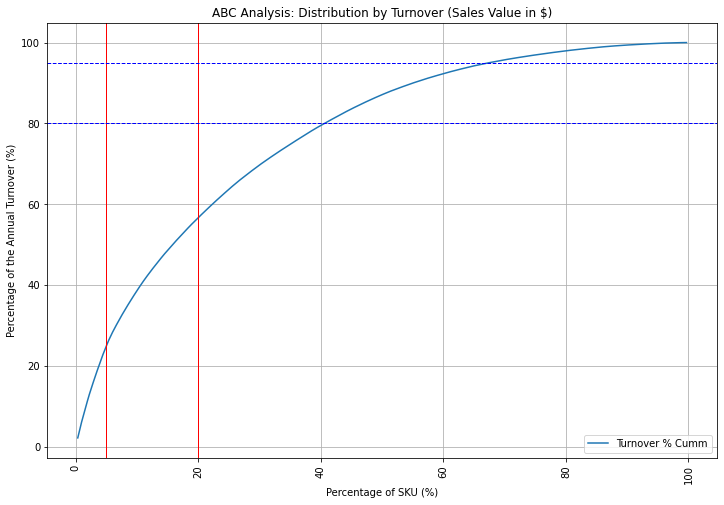

In [76]:
# Distribution by Value
ax = plt.gca()
dfABC.plot(figsize=(12, 8), x='SKU %', y='Turnover % Cumm', ax =ax, grid = True)
# ABC
# 20%, 50% of SKU Number
ax.axvline(5 , color="red", linestyle="-", linewidth = 1.0)
ax.axvline(20 , color="red", linestyle="-", linewidth = 1.0)
# 20%, 50% of SKU Number
ax.axhline(80 , color="blue", linestyle="--", linewidth = 1.0)
ax.axhline(95 , color="blue", linestyle="--", linewidth = 1.0)
plt.xlabel('Percentage of SKU (%)')
plt.xticks(rotation=90)
plt.ylabel('Percentage of the Annual Turnover (%)')
plt.title('ABC Analysis: Distribution by Turnover (Sales Value in $)')
plt.show()